In [7]:
import gym #OpenAI’s gym environment to train our Q-Learning model.
#(pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gym==0.21.0)
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

# Download windy_gridworld and plotting from the drive (or my github) and add it to your user folder.
#(https://drive.google.com/drive/folders/1hNRy2nGdFSz6BSRxlmeiL5-UoMR5DBE6)
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv #Helper code to visualize environment(it use pygame).
#(pip install pygame)
import plotting #Helper code to visualize by plotting
  
matplotlib.style.use('ggplot')

In [8]:
#Create a gym environment
env = WindyGridworldEnv()

In [9]:
#Make the greedy policy
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.
       
    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array 
    of length of the action space(set of possible actions).
    """
    def policyFunction(state):
   
        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions
                  
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
   
    return policyFunction

In [10]:
#Build Q-learning model
def qLearning(env, num_episodes, discount_factor = 1.0,
                            alpha = 0.6, epsilon = 0.1):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""
       
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
   
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))    
       
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
       
    # For every episode
    for ith_episode in range(num_episodes):
           
        # Reset the environment and pick the first action
        state = env.reset()
           
        for t in itertools.count():
               
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
   
            # choose action according to 
            # the probability distribution
            action = np.random.choice(np.arange(
                      len(action_probabilities)),
                       p = action_probabilities)
   
            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
   
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
               
            # TD Update
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
   
            # done is True if episode terminated   
            if done:
                break
                   
            state = next_state
       
    return Q, stats

In [11]:
#Train the model
Q, stats = qLearning(env, 1000)

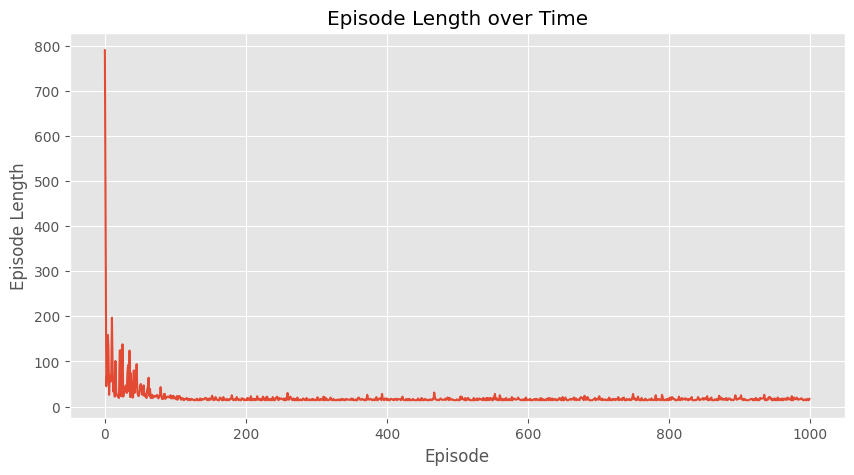

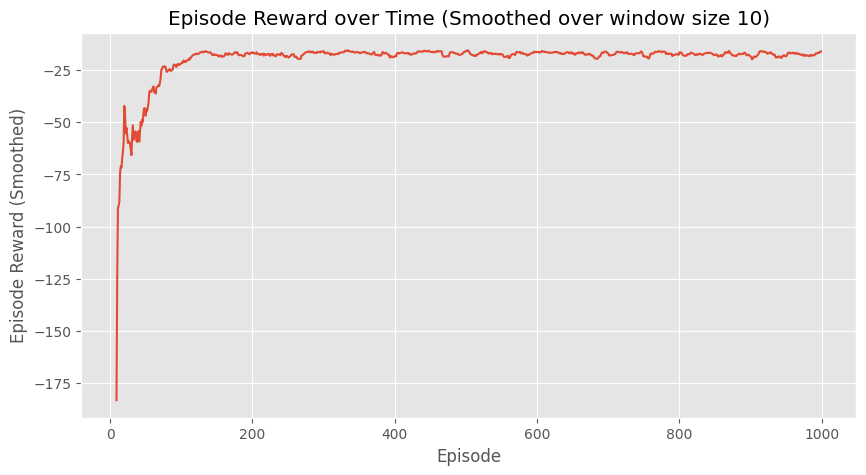

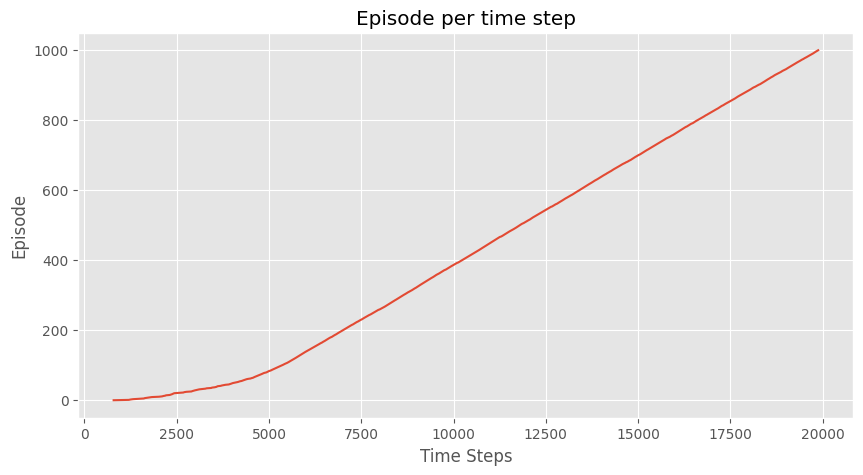

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [12]:
#Plotting Episode length over time, episode per time step, episode reward over time
plotting.plot_episode_stats(stats)